In [192]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df=pd.read_csv("athlete_events.csv")

In [149]:
df.shape

(271116, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
handle null value

In [7]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [75]:
df.dropna(axis=0,how="any",inplace=True)

In [76]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [14]:
counts=df.nunique(axis=1)

In [27]:
data=pd.read_csv(r'D:\noc_regions.csv')

In [28]:
data.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
Joining the data frame

In [11]:
join=pd.merge(df, data, on='NOC', how='left')
join.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
Unique participants

In [29]:
for vars in df.columns:
  rows=df.shape[0]
  cols=df.shape[1]
print(f'rows : {rows}')
print(f'columns : {cols}')

rows : 271116
columns : 15


In [22]:
for vars in df.columns:
  print(f'no. of unique values in {vars} : {df[vars].nunique()}\n')

no. of unique values in ID : 20767

no. of unique values in Name : 20732

no. of unique values in Sex : 2

no. of unique values in Age : 50

no. of unique values in Height : 86

no. of unique values in Weight : 183

no. of unique values in Team : 263

no. of unique values in NOC : 143

no. of unique values in Games : 51

no. of unique values in Year : 35

no. of unique values in Season : 2

no. of unique values in City : 42

no. of unique values in Sport : 55

no. of unique values in Event : 562

no. of unique values in Medal : 3



In [ ]:
total count of players from the different countries

In [36]:
yr=df.groupby('Year')['Medal'].value_counts()
yr

Year  Medal 
1896  Gold       62
      Silver     43
      Bronze     38
1900  Silver    228
      Gold      201
               ... 
2014  Bronze    198
      Silver    197
2016  Bronze    703
      Gold      665
      Silver    655
Name: Medal, Length: 105, dtype: int64

In [53]:
medals_by_name=df.groupby('Name')['Medal'].value_counts()
medals_by_name

Name                          Medal 
A. Albert                     Gold      1
A. Dubois                     Bronze    1
                              Silver    1
A. Joshua "Josh" West         Silver    1
A. Lawry                      Silver    1
                                       ..
va Risztov                    Gold      1
va Szkely (-Gyarmati)         Gold      1
                              Silver    1
ver Maximiliano David Banega  Gold      1
ystein Pettersen              Gold      1
Name: Medal, Length: 33710, dtype: int64

In [ ]:
participants in different city of USA

In [66]:
usa=df[df['NOC']=='USA']
usa

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN


In [73]:
femaleInOlympics = join[(join.Sex == 'F') & (join.NOC == 'USA')]
femaleInOlympics.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
282,149,Mara Katherine Abbott,F,30.0,163.0,52.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",NaN,USA,NaN
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA,NaN
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA,NaN
671,390,Brooke Abel,F,20.0,163.0,52.0,United States,USA,2008 Summer,2008,Summer,Beijing,Synchronized Swimming,Synchronized Swimming Women's Team,NaN,USA,NaN
874,504,Cheryl Abplanalp,F,24.0,174.0,68.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Handball,Handball Women's Handball,NaN,USA,NaN
1312,737,"Amelia Lynn ""Amy"" Acuff (-Harvey)",F,21.0,188.0,66.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's High Jump,NaN,USA,NaN
1313,737,"Amelia Lynn ""Amy"" Acuff (-Harvey)",F,25.0,188.0,66.0,United States,USA,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's High Jump,NaN,USA,NaN
1314,737,"Amelia Lynn ""Amy"" Acuff (-Harvey)",F,29.0,188.0,66.0,United States,USA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's High Jump,NaN,USA,NaN


In [69]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [74]:
join.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [77]:
join.dropna(axis=0,how="any",inplace=True)

In [78]:
join.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
notes     0
dtype: int64

In [ ]:
e most number of female and male players(YUGOSLAVIA)

In [100]:
Men =join[(join.Sex == 'M')]


Men.head(15)



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3306,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,Individual Olympic Athletes
3680,2112,Abdullah Al-Rashidi,M,52.0,183.0,83.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,Bronze,Individual Olympic Athletes,Individual Olympic Athletes
5075,2892,Ade Franci Alleyne-Forte,M,23.0,180.0,73.0,Trinidad and Tobago,TTO,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,Trinidad and Tobago
7538,4202,Dragan Andri,M,22.0,192.0,91.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Water Polo,Water Polo Men's Water Polo,Gold,Serbia,Yugoslavia
7539,4202,Dragan Andri,M,26.0,192.0,91.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Water Polo,Water Polo Men's Water Polo,Gold,Serbia,Yugoslavia
7968,4410,Andrija Ankovi,M,23.0,177.0,79.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,Gold,Serbia,Yugoslavia
8834,4847,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver,Serbia,Yugoslavia
9376,5150,Aaron Nigel Armstrong,M,30.0,173.0,70.0,Trinidad and Tobago,TTO,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 4 x 100 metres Relay,Gold,Trinidad,Trinidad and Tobago
9463,5192,Zlatan Arnautovi,M,27.0,194.0,93.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Men's Handball,Gold,Serbia,Yugoslavia
9747,5342,Abas Arslanagi,M,27.0,189.0,97.0,Yugoslavia,YUG,1972 Summer,1972,Summer,Munich,Handball,Handball Men's Handball,Gold,Serbia,Yugoslavia


In [99]:
Me =join[(join.Sex == 'F')]


Me.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6517,3652,Svetlana Anastasovski-Obuina,F,19.0,176.0,65.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Handball,Handball Women's Handball,Silver,Serbia,Yugoslavia
6518,3652,Svetlana Anastasovski-Obuina,F,23.0,176.0,65.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Gold,Serbia,Yugoslavia
8927,4897,Anelija Arbutina (-arenac),F,21.0,178.0,68.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Silver,Serbia,Yugoslavia
12839,6973,Vesna Bajkua,F,18.0,176.0,67.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Silver,Serbia,Yugoslavia
17115,9160,Mersada Beirspahi,F,22.0,185.0,75.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Bronze,Serbia,Yugoslavia
21984,11592,Aranka Binder,F,26.0,163.0,47.0,Individual Olympic Athletes,IOA,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Women's Air Rifle, 10 metres",Bronze,Individual Olympic Athletes,Individual Olympic Athletes
22545,11886,Mira Bjedov (-Nikoli),F,24.0,192.0,77.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Bronze,Serbia,Yugoslavia
22546,11887,"ura ""urica"" Bjedov",F,21.0,170.0,65.0,Yugoslavia,YUG,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,Gold,Serbia,Yugoslavia
22547,11887,"ura ""urica"" Bjedov",F,21.0,170.0,65.0,Yugoslavia,YUG,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,Silver,Serbia,Yugoslavia
46943,24183,Alenka Cuderman,F,23.0,166.0,59.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Gold,Serbia,Yugoslavia


<AxesSubplot:xlabel='Event', ylabel='Year'>

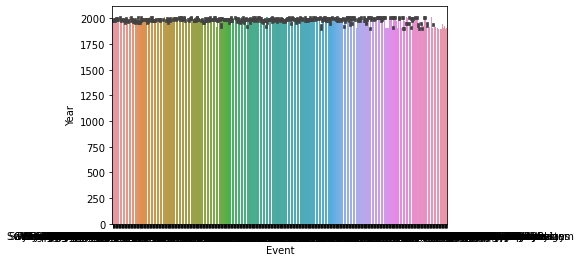

In [108]:
sns.barplot(x='Event',y='Year',data=df)

In [ ]:
different sports played in a different season

In [116]:
sports=df.groupby('Year')['Season'].value_counts()
sports

Year  Season
1896  Summer      20
1900  Summer      38
1904  Summer      59
1906  Summer      69
1908  Summer     134
1912  Summer     130
1920  Summer     182
1924  Summer     169
      Winter      16
1928  Summer     164
      Winter       6
1932  Summer     166
      Winter      10
1936  Summer     170
      Winter      23
1948  Summer     182
      Winter      13
1952  Summer     278
      Winter      24
1956  Summer     506
      Winter      84
1960  Summer     885
      Winter      91
1964  Summer    1018
      Winter     158
1968  Summer    1053
      Winter     195
1972  Summer    1202
      Winter     199
1976  Summer    1303
      Winter     195
1980  Summer    1377
      Winter     195
1984  Summer    1463
      Winter     220
1988  Summer    1576
      Winter     251
1992  Summer    1523
      Winter     311
1994  Winter     324
1996  Summer    1717
1998  Winter     437
2000  Summer    1993
2002  Winter     477
2004  Summer    2000
2006  Winter     526
2008  Summer    2035


In [ ]:
 names of players who brought gold, silver and bronze medal.

In [154]:
name=df.groupby('Name')['Medal'].value_counts()
name

Name                          Medal 
A. Albert                     Gold      1
A. Dubois                     Bronze    1
                              Silver    1
A. Joshua "Josh" West         Silver    1
A. Lawry                      Silver    1
                                       ..
va Risztov                    Gold      1
va Szkely (-Gyarmati)         Gold      1
                              Silver    1
ver Maximiliano David Banega  Gold      1
ystein Pettersen              Gold      1
Name: Medal, Length: 33710, dtype: int64

In [ ]:
different sports played by female player and many more information

In [157]:
women = join[(join.Sex == 'F')] 
women.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6517,3652,Svetlana Anastasovski-Obuina,F,19.0,176.0,65.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Handball,Handball Women's Handball,Silver,Serbia,Yugoslavia
6518,3652,Svetlana Anastasovski-Obuina,F,23.0,176.0,65.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Gold,Serbia,Yugoslavia
8927,4897,Anelija Arbutina (-arenac),F,21.0,178.0,68.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Silver,Serbia,Yugoslavia
12839,6973,Vesna Bajkua,F,18.0,176.0,67.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Silver,Serbia,Yugoslavia
17115,9160,Mersada Beirspahi,F,22.0,185.0,75.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Bronze,Serbia,Yugoslavia
21984,11592,Aranka Binder,F,26.0,163.0,47.0,Individual Olympic Athletes,IOA,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Women's Air Rifle, 10 metres",Bronze,Individual Olympic Athletes,Individual Olympic Athletes
22545,11886,Mira Bjedov (-Nikoli),F,24.0,192.0,77.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Bronze,Serbia,Yugoslavia
22546,11887,"ura ""urica"" Bjedov",F,21.0,170.0,65.0,Yugoslavia,YUG,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,Gold,Serbia,Yugoslavia
22547,11887,"ura ""urica"" Bjedov",F,21.0,170.0,65.0,Yugoslavia,YUG,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,Silver,Serbia,Yugoslavia
46943,24183,Alenka Cuderman,F,23.0,166.0,59.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Gold,Serbia,Yugoslavia


Text(0.5, 1.0, 'Women participate in Games')

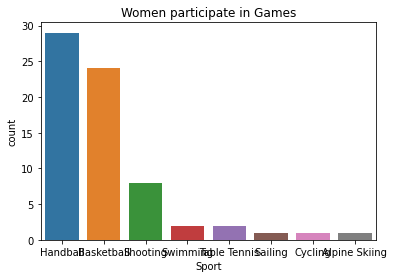

In [159]:
sns.countplot(x='Sport', data=women)
plt.title('Women participate in Games')

In [ ]:
Handball is most participated by Female player

In [160]:
men = join[(join.Sex == 'M')] 
men.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3306,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,Individual Olympic Athletes
3680,2112,Abdullah Al-Rashidi,M,52.0,183.0,83.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,Bronze,Individual Olympic Athletes,Individual Olympic Athletes
5075,2892,Ade Franci Alleyne-Forte,M,23.0,180.0,73.0,Trinidad and Tobago,TTO,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,Trinidad and Tobago
7538,4202,Dragan Andri,M,22.0,192.0,91.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Water Polo,Water Polo Men's Water Polo,Gold,Serbia,Yugoslavia
7539,4202,Dragan Andri,M,26.0,192.0,91.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Water Polo,Water Polo Men's Water Polo,Gold,Serbia,Yugoslavia
7968,4410,Andrija Ankovi,M,23.0,177.0,79.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,Gold,Serbia,Yugoslavia
8834,4847,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver,Serbia,Yugoslavia
9376,5150,Aaron Nigel Armstrong,M,30.0,173.0,70.0,Trinidad and Tobago,TTO,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 4 x 100 metres Relay,Gold,Trinidad,Trinidad and Tobago
9463,5192,Zlatan Arnautovi,M,27.0,194.0,93.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Men's Handball,Gold,Serbia,Yugoslavia
9747,5342,Abas Arslanagi,M,27.0,189.0,97.0,Yugoslavia,YUG,1972 Summer,1972,Summer,Munich,Handball,Handball Men's Handball,Gold,Serbia,Yugoslavia


Text(0.5, 1.0, 'men participate in Games')

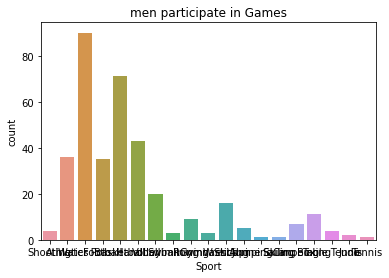

In [161]:
sns.countplot(x='Sport', data=men)
plt.title('men  in Games')

In [172]:
df['NOC'].value_counts()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: NOC, Length: 230, dtype: int64

In [180]:
len(df[df.NOC =='FRA'])

12758

In [184]:
df1= df[df['NOC']=="USA"]

# 

In [185]:
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN


In [195]:
np.mean(df1.Age)

26.05060630557801

In [ ]:
London city has max number of player

In [197]:
df['City'].value_counts()

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [202]:
df['Team'].value_counts()

United States     17847
France            11988
Great Britain     11404
Italy             10260
Germany            9326
                  ...  
Tornade-16            1
Breslau               1
Rozenn-3              1
Plume-patte-32        1
Lbeck                 1
Name: Team, Length: 1184, dtype: int64

In [ ]:
Number of player from India and Pakistan

In [204]:
len(df[df.Team =='India'])

1400

In [205]:
len(df[df.Team =='Pakistan'])

562

In [236]:
%matplotlib inline

In [ ]:
won the maximum number of gold, silver and bronze

In [251]:
team_medal=df.groupby('Team')['Medal'].count()
team_medal

Team
30. Februar               0
A North American Team     4
Acipactli                 0
Acturus                   0
Afghanistan               2
                         ..
Zambia                    2
Zefyros                   0
Zimbabwe                 22
Zut                       3
rn-2                      0
Name: Medal, Length: 1184, dtype: int64

<AxesSubplot:xlabel='Team'>

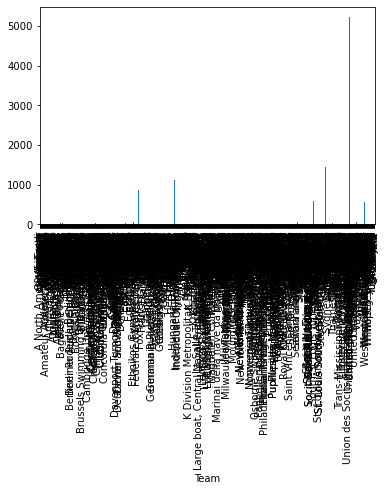

In [261]:
team_medal.plot(kind='bar')

In [254]:
goldMedals = df[(df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [257]:
silverMedals = df[(df.Medal == 'Silver')]
silverMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
106,38,Karl Jan Aas,M,20.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver


In [266]:
dat=df['Height']

In [269]:
medals_country=df.groupby('Team')['Medal'].count().sort_values(ascending=False)[:20]
medals_country

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Russia           1110
Netherlands       988
East Germany      941
Japan             911
Norway            910
China             901
Finland           876
Romania           651
South Korea       592
Switzerland       588
Name: Medal, dtype: int64

In [ ]:
variation in number of players from india and pakistan

In [271]:
india_total_medals=join.groupby('Year')['Medal'].count()
india_total_medals

Year
1908     3
1912     1
1948     1
1952     3
1956     6
1960    22
1964    21
1968    29
1972    18
1976    20
1980    56
1984    88
1988    70
1992     3
1996    26
2000    27
2004    16
2008     6
2012    11
2016     3
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Year'>

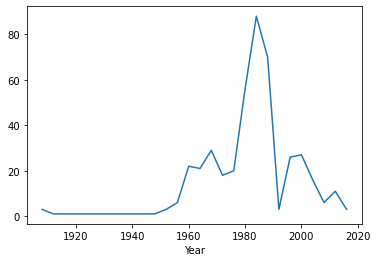

In [273]:
india_total_medals.plot(kind='line')

In [274]:
pakistan_total_medals=join.groupby('Year')['Medal'].count()
pakistan_total_medals

Year
1908     3
1912     1
1948     1
1952     3
1956     6
1960    22
1964    21
1968    29
1972    18
1976    20
1980    56
1984    88
1988    70
1992     3
1996    26
2000    27
2004    16
2008     6
2012    11
2016     3
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Year'>

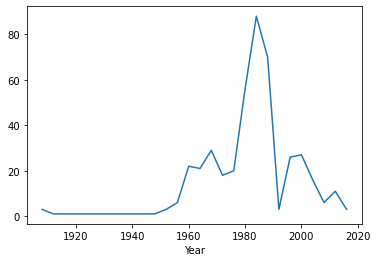

In [275]:
pakistan_total_medals.plot(kind='line')